In [42]:
#Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [14]:
train = pd.read_csv("train.csv")
songs = pd.read_csv("songs.csv")
members = pd.read_csv("members.csv")
song_info = pd.read_csv("song_extra_info.csv")
test = pd.read_csv("test.csv")

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
train.head(2)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1


In [15]:
songs.head(2)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0


In [16]:
members.head(2)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622


In [18]:
song_info.head(2)

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015


In [19]:
test.head(2)

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library


In [58]:
#Combining all datasets
data1 = pd.merge(train,songs,on='song_id', how='left')
data2 = pd.merge(data1,song_info,on='song_id', how='left')
data =  pd.merge(data2,members,on='msno', how='left')
del data1,data2

In [59]:
data.head(2)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,NaN,NaN,13,24,female,9,20110525,20170911


In [60]:
data = data[[col for col in data.columns if col != 'target'] + ['target']]

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   song_length             float64
 6   genre_ids               object 
 7   artist_name             object 
 8   composer                object 
 9   lyricist                object 
 10  language                float64
 11  name                    object 
 12  isrc                    object 
 13  city                    int64  
 14  bd                      int64  
 15  gender                  object 
 16  registered_via          int64  
 17  registration_init_time  int64  
 18  expiration_date         int64  
 19  target                  int64  
dtypes: float64(2), int64(6), object(12)
memory usage: 1.1+ GB


In [62]:
data.shape

(7377418, 20)

In [63]:
data.isnull().sum()

msno                            0
song_id                         0
source_system_tab           24849
source_screen_name         414804
source_type                 21539
song_length                   114
genre_ids                  118455
artist_name                   114
composer                  1675706
lyricist                  3178812
language                      150
name                      1305106
isrc                      1779785
city                            0
bd                              0
gender                    2961479
registered_via                  0
registration_init_time          0
expiration_date                 0
target                          0
dtype: int64

In [64]:
#Extracting non-numeric columns
data.select_dtypes(include="object").columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'genre_ids', 'artist_name', 'composer', 'lyricist',
       'name', 'isrc', 'gender'],
      dtype='object')

In [65]:
#Replacing missing values in non-numeric columns with 'unknown'
cols_obj = data.select_dtypes(include="object").columns
data[cols_obj]=data[cols_obj].fillna(value='unknown')

In [66]:
#Extracting numeric columns
cols_num = data.select_dtypes(include="number").columns

In [67]:
#Replacing missing values in numeric columns with respective median
for col in cols_num:
    data[col]=data[col].fillna(value= data[col].median())

In [68]:
#Rechecking for missing data
data.isnull().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
name                      0
isrc                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
target                    0
dtype: int64

In [69]:
#Checking for Duplicates
data.duplicated().sum()

0

#### Extracting Date

In [70]:
#Converting date columns to datetime format and extracting details
data['registration_init_time'] = pd.to_datetime(data['registration_init_time'], format = "%Y%m%d")

data['registration_init_year'] = data['registration_init_time'].dt.year
data['registration_init_month'] = data['registration_init_time'].dt.month
data['registration_init_date'] = data['registration_init_time'].dt.day

In [71]:
data['expiration_date'] = pd.to_datetime(data['expiration_date'], format = "%Y%m%d")

data['expiration_date_year'] = data['expiration_date'].dt.year
data['expiration_date_month'] = data['expiration_date'].dt.month
data['expiration_date_date'] = data['expiration_date'].dt.day

In [72]:
#Dropping registration_init_time and expiration_date column as features have been extracted
data.drop(['registration_init_time', 'expiration_date'], axis=1, inplace=True)

#### Label Encoding variables with categorical values

In [73]:
#Extracting non-numeric columns for encoding
cols_cat= data.select_dtypes(include='object').columns
cols_cat

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'genre_ids', 'artist_name', 'composer', 'lyricist',
       'name', 'isrc', 'gender'],
      dtype='object')

In [74]:
#Applying Laber Encoder 
le = LabelEncoder()
data[cols_cat] = data[cols_cat].apply(le.fit_transform)

In [75]:
data.head(2)

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,target,registration_init_year,registration_init_month,registration_init_date,expiration_date_year,expiration_date_month,expiration_date_date
0,8158,74679,1,7,6,206471.0,285,3277,14581,22975,52.0,37252,43581,1,0,2,7,1,2012,1,2,2017,10,5
1,17259,223479,3,8,4,284584.0,90,31960,64996,22975,52.0,118403,194862,13,24,0,9,1,2011,5,25,2017,9,11


In [76]:
# Rename columns in the DataFrame 'data'
data.rename(columns={
    'msno': 'user_id',
    'bd': 'age'
},inplace= True)

In [77]:
data.head(2)

,user_id,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,age,gender,registered_via,target,registration_init_year,registration_init_month,registration_init_date,expiration_date_year,expiration_date_month,expiration_date_date
0,8158,74679,1,7,6,206471.0,285,3277,14581,22975,52.0,37252,43581,1,0,2,7,1,2012,1,2,2017,10,5
1,17259,223479,3,8,4,284584.0,90,31960,64996,22975,52.0,118403,194862,13,24,0,9,1,2011,5,25,2017,9,11


In [78]:
data.shape

(7377418, 24)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   user_id                  int32  
 1   song_id                  int32  
 2   source_system_tab        int32  
 3   source_screen_name       int32  
 4   source_type              int32  
 5   song_length              float64
 6   genre_ids                int32  
 7   artist_name              int32  
 8   composer                 int32  
 9   lyricist                 int32  
 10  language                 float64
 11  name                     int32  
 12  isrc                     int32  
 13  city                     int64  
 14  age                      int64  
 15  gender                   int32  
 16  registered_via           int64  
 17  target                   int64  
 18  registration_init_year   int32  
 19  registration_init_month  int32  
 20  registration_init_date   int32  
 21  expirati

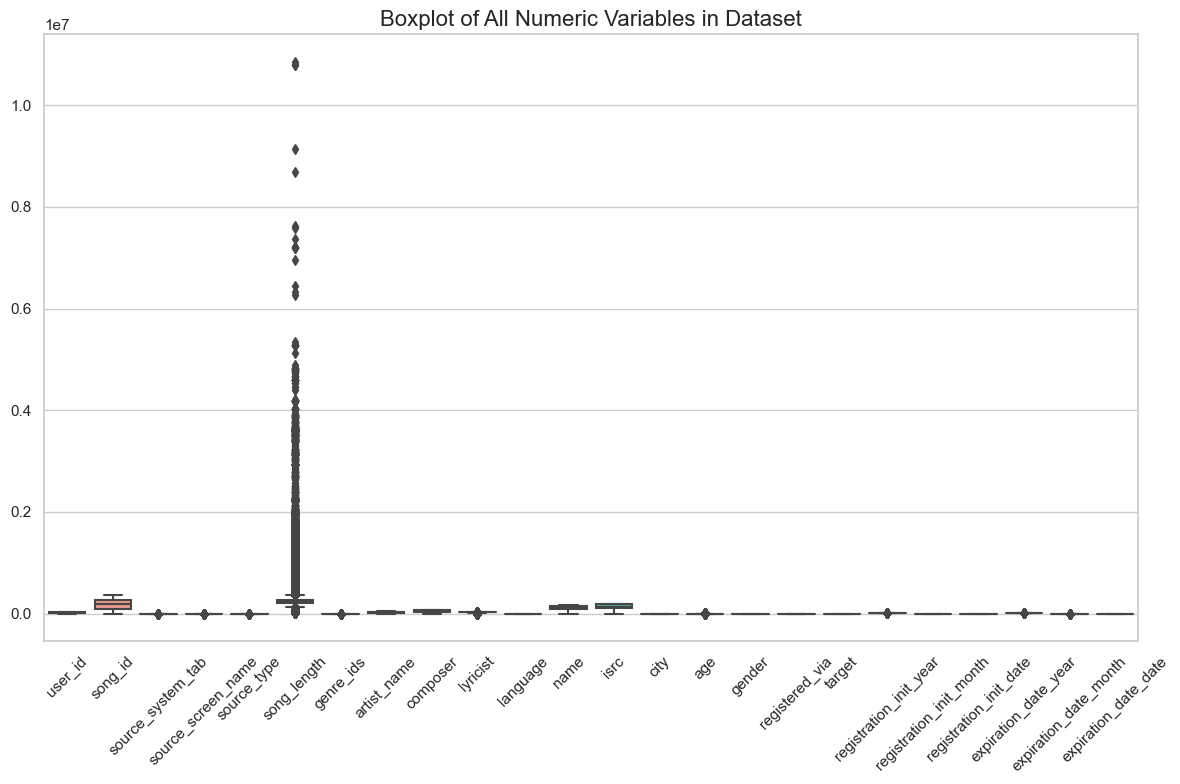

In [82]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a boxplot for all numeric columns in the dataset 'data'
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(data=data.select_dtypes(include='number'))

# Add titles and labels
plt.title('Boxplot of All Numeric Variables in Dataset', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels

# Show the plot
plt.show();

In [86]:
#Function to cap outliers
def cap_outliers(df):
    for column in df.select_dtypes(include='number').columns:
        Q1 = df[column].quantile(0.25)  # First quartile
        Q3 = df[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        
        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the outliers
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df

# Cap the outliers in the dataset 'data'
data = cap_outliers(data)

            user_id       song_id  source_system_tab  source_screen_name  \
count  7.377418e+06  7.377418e+06       7.377418e+06        7.377418e+06   
mean   1.542191e+04  1.794591e+05       2.439390e+00        9.100995e+00   
std    8.894859e+03  1.038079e+05       1.885937e+00        3.461479e+00   
min    0.000000e+00  0.000000e+00       0.000000e+00        3.500000e+00   
25%    7.713000e+03  8.919500e+04       0.000000e+00        8.000000e+00   
50%    1.551300e+04  1.788250e+05       3.000000e+00        8.000000e+00   
75%    2.317300e+04  2.680050e+05       3.000000e+00        1.100000e+01   
max    3.075400e+04  3.599650e+05       7.500000e+00        1.550000e+01   

        source_type   song_length     genre_ids   artist_name      composer  \
count  7.377418e+06  7.377418e+06  7.377418e+06  7.377418e+06  7.377418e+06   
mean   4.759919e+00  2.434814e+05  3.404168e+02  2.772116e+04  5.404128e+04   
std    2.455154e+00  4.426244e+04  8.375490e+00  1.264773e+04  2.109593e+04   

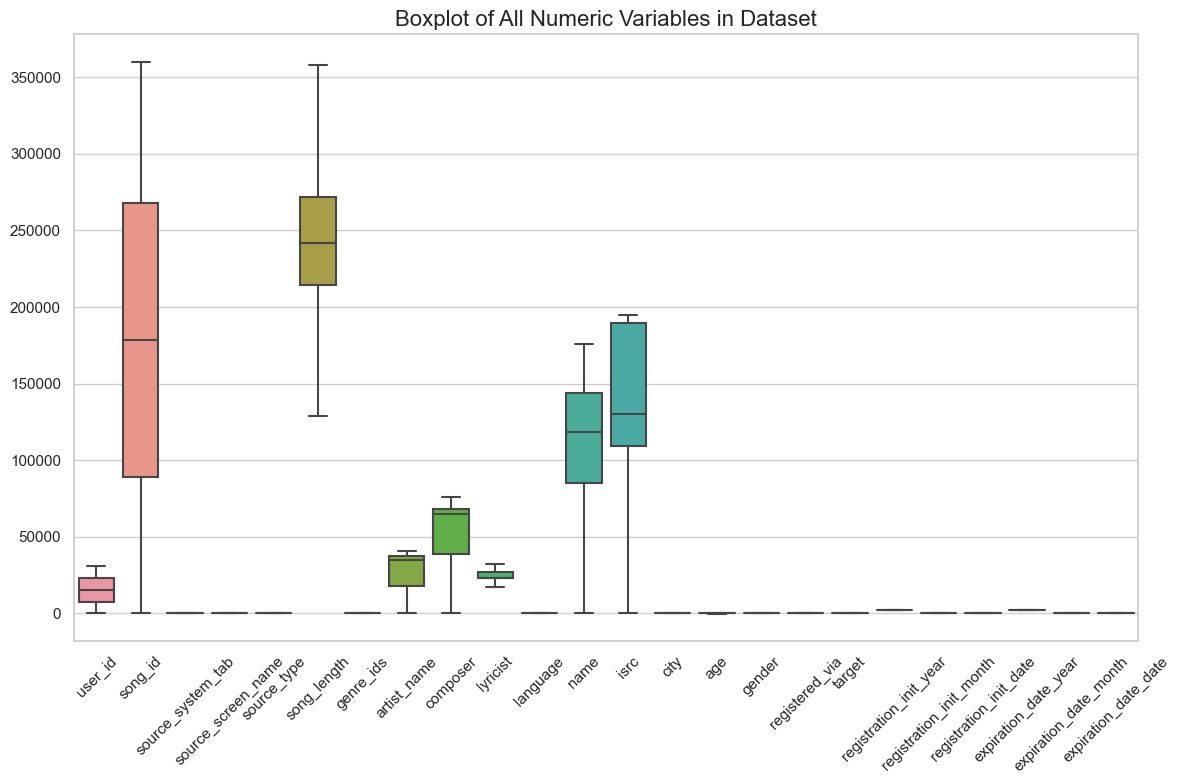

In [88]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a boxplot for all numeric columns in the dataset 'data'
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(data=data.select_dtypes(include='number'))

# Add titles and labels
plt.title('Boxplot of All Numeric Variables in Dataset', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels

# Show the plot
plt.show();

In [89]:
#Splitting input and output columns
X = data.drop("target",axis=1)
y = data.target

#### Scaling

In [90]:
#Scaling input column
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [91]:
#train test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [92]:
def ML(model):
    print('Train Score: {}'.format(model.score(train_X, train_y)))  
    print('Test Score: {}'.format(model.score(test_X, test_y)))  
    print('\n')
    print('----------------------------')
    print('\n')
    
    pred_y =model.predict(test_X)
    
    #Confusion Matrix
    print('Confusion Matrix')
    print('\n')
    cm = confusion_matrix(pred_y, test_y)
    ConfusionMatrixDisplay(cm).plot()
    plt.show()
    print('\n')
    print('----------------------------')
    print('\n')
    
    #Classification Report
    print('Classification Report')
    print('\n')
    print(classification_report(pred_y, test_y))
    print('\n')
    print('----------------------------')
    print('\n')
    
    #Accuracy Score
    print('Accuracy Score')
    global accuracy
    print('\n')
    accuracy = round((accuracy_score(test_y,pred_y)),4)
    print("Test Accuracy of {}  : {}".format(model, accuracy*100))
    print('\n')
    print('----------------------------')
    print('\n')
    
    #Cross Validation Score
    print('Cross Validation Score')
    global Cross_val
    print('\n')
    Cross_val = round((cross_val_score(model, test_X,test_y, cv=5).mean()),4)     
    print("Cross-Validation Accuracy Scores: ",Cross_val*100)
    
    return accuracy, Cross_val

### Model 1: Logistic Regression

In [93]:
LR = LogisticRegression()
LR.fit(train_X, train_y)

LogisticRegression()

Train Score: 0.5937943438199045
Test Score: 0.5935087514786108


----------------------------


Confusion Matrix




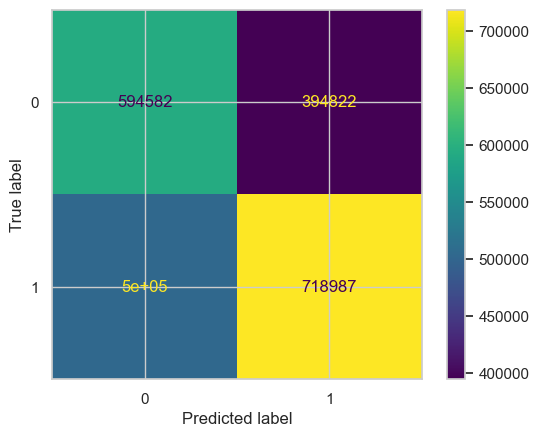



----------------------------


Classification Report


              precision    recall  f1-score   support

           0       0.54      0.60      0.57    989404
           1       0.65      0.59      0.62   1223822

    accuracy                           0.59   2213226
   macro avg       0.59      0.59      0.59   2213226
weighted avg       0.60      0.59      0.59   2213226



----------------------------


Accuracy Score


Test Accuracy of LogisticRegression()  : 59.35


----------------------------


Cross Validation Score


Cross-Validation Accuracy Scores:  59.34


(0.5935, 0.5934)

In [94]:
ML(LR)

Logistic Regression did not work well with this data, let us try Decision Tree Model. 

### Model 2: Decison Tree Classifier Model 

In [95]:
# fit model on training data
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

Train Score: 1.0
Test Score: 0.6350693512546843


----------------------------


Confusion Matrix




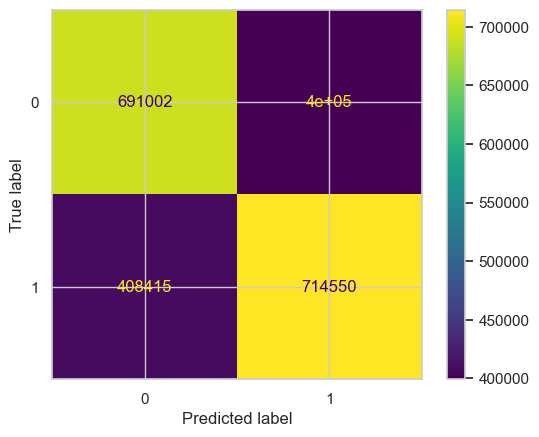



----------------------------


Classification Report


              precision    recall  f1-score   support

           0       0.63      0.63      0.63   1090261
           1       0.64      0.64      0.64   1122965

    accuracy                           0.64   2213226
   macro avg       0.64      0.64      0.64   2213226
weighted avg       0.64      0.64      0.64   2213226



----------------------------


Accuracy Score


Test Accuracy of DecisionTreeClassifier()  : 63.51


----------------------------


Cross Validation Score


Cross-Validation Accuracy Scores:  60.67


(0.6351, 0.6067)

In [96]:
ML(decision_tree)

### Model no. 3 Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
# fit model on training data
ran_forest = RandomForestClassifier(
    n_estimators=50,       # Number of trees
    max_depth=10,          # Depth of each tree
    min_samples_split=5,   # Minimum samples to split
    min_samples_leaf=2,    # Minimum samples at leaf
    random_state=42        # Random seed
)
ran_forest.fit(train_X, train_y)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50, random_state=42)

Train Score: 0.6370611317317404
Test Score: 0.6361591631401402


----------------------------


Confusion Matrix




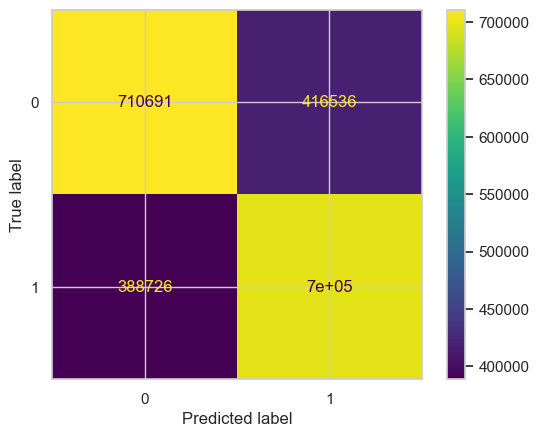



----------------------------


Classification Report


              precision    recall  f1-score   support

           0       0.65      0.63      0.64   1127227
           1       0.63      0.64      0.63   1085999

    accuracy                           0.64   2213226
   macro avg       0.64      0.64      0.64   2213226
weighted avg       0.64      0.64      0.64   2213226



----------------------------


Accuracy Score


Test Accuracy of RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50, random_state=42)  : 63.62


----------------------------


Cross Validation Score


Cross-Validation Accuracy Scores:  63.57000000000001


(0.6362, 0.6357)

In [98]:
ML(ran_forest)

#### Predicting on Test set

In [99]:
test.head(2)

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library


In [100]:
#Combining test dataset with other datasets
df1 = pd.merge(test,songs,on='song_id', how='left')
df2 = pd.merge(df1,song_info,on='song_id', how='left')
test_df =  pd.merge(df2,members,on='msno', how='left')
del df1,df2

In [101]:
test_df.shape

(2556790, 20)

#### Checking and filling null values

In [102]:
#Checking for missing values
test_df.isnull().sum().sum()

4224298

In [103]:
#Let us replace the null values as we did on our train dataset

#Replacing missing values in non-numeric columns with 'unknown'
cols_obj = test_df.select_dtypes(include="object").columns
test_df[cols_obj] = test_df[cols_obj].fillna(value='unknown')

#Replacing missing values in numeric columns with respective median
cols_num = test_df.select_dtypes(include="number").columns
for col in cols_num:
    test_df[col] = test_df[col].fillna(value = test_df[col].median())

#### Extracting Date

In [104]:
#Converting date columns to datetime format and extracting details
test_df['registration_init_time'] = pd.to_datetime(test_df['registration_init_time'], format = "%Y%m%d")

test_df['registration_init_year'] = test_df['registration_init_time'].dt.year
test_df['registration_init_month'] = test_df['registration_init_time'].dt.month
test_df['registration_init_date'] = test_df['registration_init_time'].dt.day


test_df['expiration_date'] = pd.to_datetime(test_df['expiration_date'], format = "%Y%m%d")

test_df['expiration_date_year'] = test_df['expiration_date'].dt.year
test_df['expiration_date_month'] = test_df['expiration_date'].dt.month
test_df['expiration_date_date'] = test_df['expiration_date'].dt.day

In [105]:
#Dropping registration_init_time and expiration_date column as features have been extracted and also dropping id column 
test_df.drop(['registration_init_time', 'expiration_date','id'], axis=1, inplace=True)

#### Label Encoding the data

In [106]:
#Label encoding
cols_cat= test_df.select_dtypes(include='object').columns
test_df[cols_cat] = test_df[cols_cat].apply(le.fit_transform)

In [107]:
test_df.head(2)

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_year,registration_init_month,registration_init_date,expiration_date_year,expiration_date_month,expiration_date_date
0,12934,122191,3,8,3,224130.0,300,24890,33218,16357,3.0,94843,92420,1,0,2,7,2016,2,19,2017,9,18
1,12934,217907,3,8,3,320470.0,306,24743,47677,18458,3.0,89422,79115,1,0,2,7,2016,2,19,2017,9,18


In [108]:
# Rename columns in the DataFrame 'data'
test_df.rename(columns={
    'msno': 'user_id',
    'bd': 'age'
},inplace= True)

#### Outlier detection and Outlier treatment

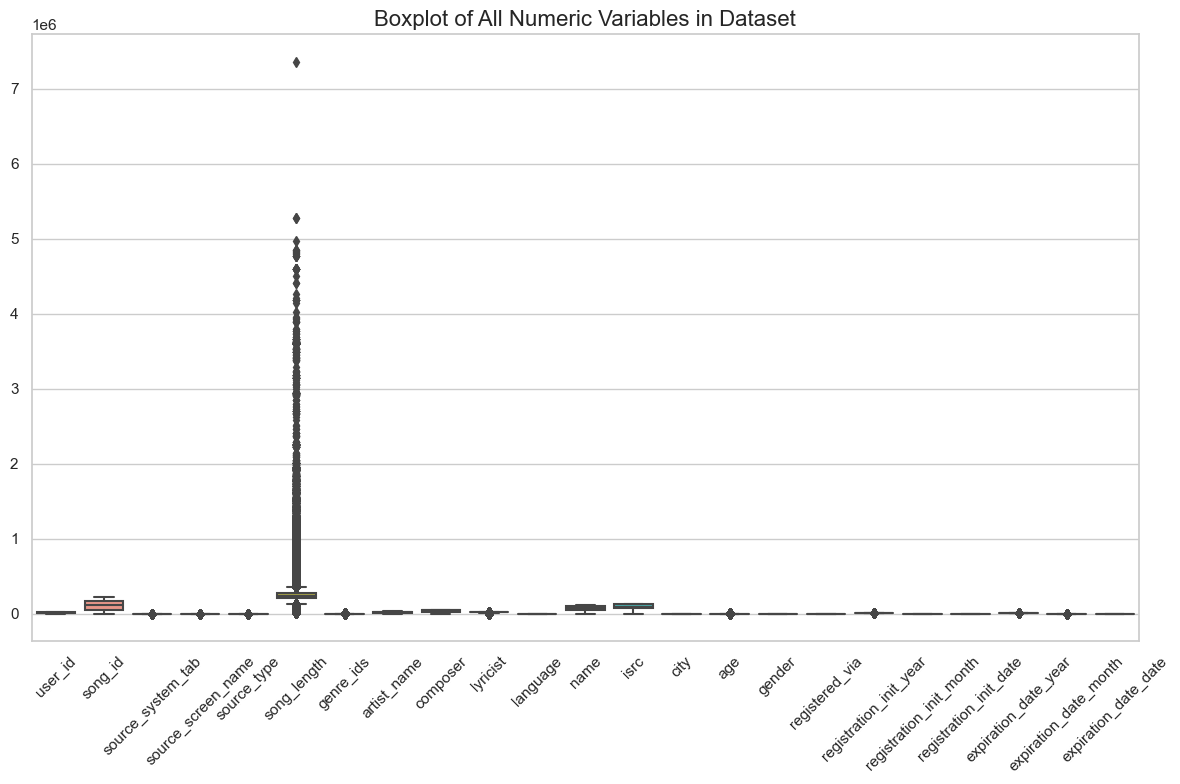

In [110]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a boxplot for all numeric columns in the dataset 'data'
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(data=test_df.select_dtypes(include='number'))

# Add titles and labels
plt.title('Boxplot of All Numeric Variables in Dataset', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels

# Show the plot
plt.show();

In [112]:
#Function to cap outliers
def cap_outliers(df):
    for column in df.select_dtypes(include='number').columns:
        Q1 = df[column].quantile(0.25)  # First quartile
        Q3 = df[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        
        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the outliers
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df

# Cap the outliers in the dataset 'data'
data = cap_outliers(test_df)

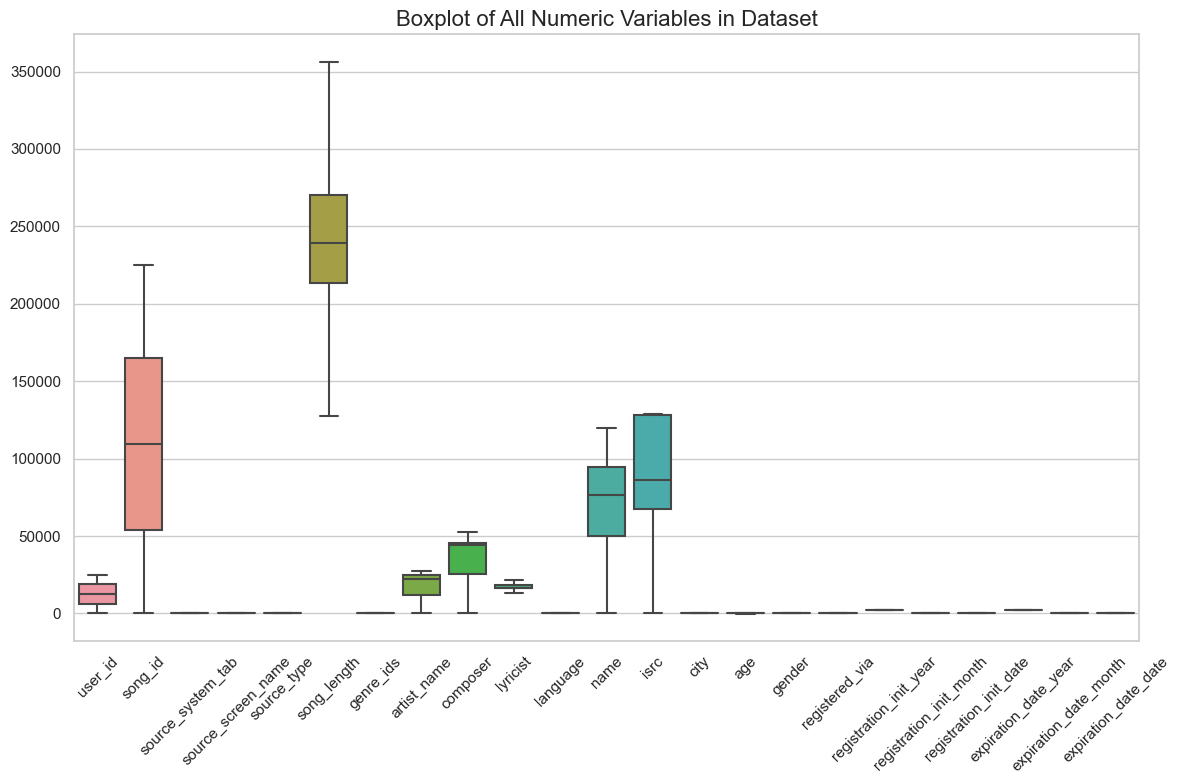

In [114]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a boxplot for all numeric columns in the dataset 'data'
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(data=test_df.select_dtypes(include='number'))

# Add titles and labels
plt.title('Boxplot of All Numeric Variables in Dataset', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels

# Show the plot
plt.show();

### Scale the data

In [116]:
#Scaling test data columns
test_scaled = pd.DataFrame(scaler.fit_transform(test_df), columns = test_df.columns)

#### Data is now ready for prediction 

In [117]:
Y = ran_forest.predict(test_scaled)

In [118]:
Y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [119]:
#Cross Validation Score
Cross_val= round((cross_val_score(ran_forest, test_scaled,Y, cv=5).mean()),4)     
print("Cross-Validation Accuracy Scores : ",Cross_val*100)

Cross-Validation Accuracy Scores :  99.2


#### Predictions 

In [120]:
#converting our predictions to dataframe
df_Y = pd.DataFrame(Y, columns= ['target'])
df_Y

,target
0,1
1,1
2,0
3,0
4,0
...,...
2556785,0
2556786,0
2556787,0
2556788,0


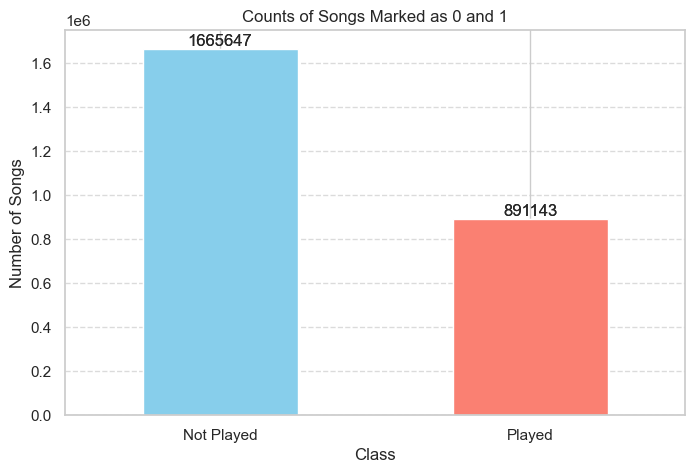

In [124]:
# Count the occurrences of each class (0 and 1)
class_counts = df_Y['target'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
bars = class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Counts of Songs Marked as 0 and 1')
plt.xlabel('Class')
plt.ylabel('Number of Songs')
plt.xticks(ticks=[0, 1], labels=['Not Played', 'Played'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars
for bar in bars.patches:
    plt.annotate(bar.get_height(), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

# Show the plot
plt.show();

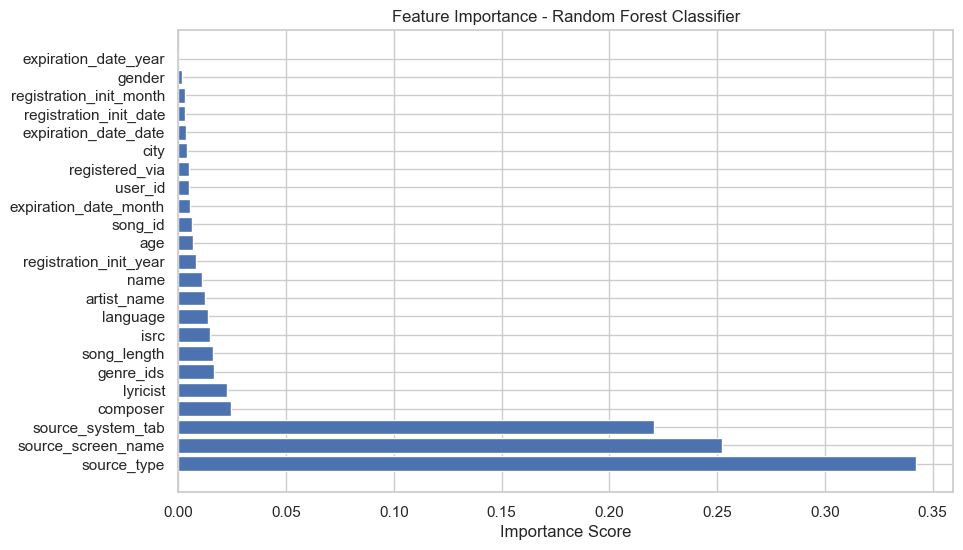

In [121]:
importances = ran_forest.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': test_scaled.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance - Random Forest Classifier')
plt.show();

From the above we can see that Random forest Model, Decision Tree Model both work very well, however we can go ahead with Random Forest Model as it is less prone to overfitting. 
Less Prone to Overfitting: Random Forest is generally less prone to overfitting compared to a single Decision Tree. This is because it aggregates the predictions from multiple trees (using a method called bagging), which helps to smooth out the predictions and reduce variance.
Robustness: The model combines multiple trees trained on random subsets of the data and features, which adds robustness against overfitting and helps capture general patterns rather than noise.

The top 3 repetitions occur when users click on source_system_tab, source_screen_name and source_type. 
The Model correctly predicted 8,91,143 songs played repeatedly while 16,65,647 songs were not played on repeat which is 34% of the total songs were played repeatedly.  

In [177]:
test.source_system_tab.unique()

array(['my library', 'discover', 'radio', 'search', 'listen with',
       'explore', 'settings', nan, 'notification'], dtype=object)

In [178]:
test.source_screen_name.unique()

array(['Local playlist more', nan, 'Radio', 'Online playlist more',
       'Artist more', 'Discover Genre', 'Album more', 'Discover Chart',
       'Discover Feature', 'Search', 'Unknown', 'Explore',
       'Others profile more', 'My library', 'My library_Search',
       'Search Trends', 'Discover New', 'Search Home', 'Payment',
       'Self profile more', 'People local', 'Concert', 'People global'],
      dtype=object)

In [179]:
test.source_type.unique()

array(['local-library', 'song-based-playlist', 'radio', 'local-playlist',
       'online-playlist', 'top-hits-for-artist', 'album', 'song',
       'listen-with', 'my-daily-playlist', 'topic-article-playlist', nan,
       'artist'], dtype=object)